In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [2]:
data = np.genfromtxt("A2Q2Data_train.csv", delimiter=',')
train = data

In [3]:
X = train[:,:100]
Y = train[:,100].reshape((-1,1))

In [4]:
def create_mini_batches(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y))
    np.random.shuffle(data)
    num_mb = data.shape[0] // batch_size
  
    for i in range(num_mb):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))

    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches

In [5]:
w_ml = np.linalg.inv(X.T @ X) @ (X.T @ Y)

In [6]:
# squared_loss_train_min = (1/(2*Y.shape[0]))*np.linalg.norm(X @ w_ml  - Y)**2
squared_loss_train_min = (1/(2*Y.shape[0]))*np.linalg.norm(X @ w_ml  - Y)
print(f"Minimum loss : {squared_loss_train_min}")

Minimum loss : 0.0009960728118808026


In [7]:
# def gradient_descent(X,Y,learning_rate=1e-3,max_epochs=10):
#     steps = []
#     grad = []
#     W = np.zeros((X.shape[1],1))
#     for epoch in tqdm(range(max_epochs)):
#         result = np.linalg.norm(W-w_ml)
#         W = W - (1/Y.shape[0])*learning_rate*((X.T @ X)@W - X.T@Y)
#         grad.append(result)
#         steps.append(epoch)
#     return steps,grad

In [8]:
def stochastic_gradient_descent(X,Y,batch_size=64,learning_rate=1e-3,max_epochs=10):
    steps = []
    grad = []
    W = np.zeros((X.shape[1],1))
    Wsum = 0

    for epoch in tqdm(range(max_epochs)):
        result = np.linalg.norm(W-w_ml)
        mini_batches = create_mini_batches(X,Y,batch_size)
        for idx,mini_batch in enumerate(mini_batches,1):
            X_b,Y_b = mini_batch
            W = W - (1/Y_b.shape[0])*learning_rate*((X_b.T @ X_b)@W - X_b.T@Y_b)
            Wsum += W
        W = Wsum/idx
        Wsum = 0
        grad.append(result)
        steps.append(epoch)
    return steps,grad

In [26]:
def gradient_descent_ridged(X_train,Y_train,X_val,Y_val,learning_rate=1e-3,max_epochs=10,lambd=0):
    W = np.zeros((X.shape[1],1))
    for epoch in tqdm(range(max_epochs)):
        W = W - (1/Y_train.shape[0])*learning_rate*((X_train.T @ X_train)@W - X_train.T@Y_train + lambd*W)
    # squared_loss = (1/(2*Y_val.shape[0]))*(np.linalg.norm(X_val @ W - Y_val)**2 + lambd*np.linalg.norm(W)**2)
    squared_loss = (1/(2*Y_val.shape[0]))*(np.linalg.norm(X_val @ W - Y_val) + lambd*np.linalg.norm(W))
    return squared_loss,W

In [27]:
# Epoch1,Grads1 =  gradient_descent(X,Y,learning_rate=1e-3,max_epochs=100)
Epoch2,Grads2 = stochastic_gradient_descent(X,Y,batch_size=100,learning_rate=1e-3,max_epochs=100)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 23.17it/s]


In [28]:
# plt.figure(figsize=(10,10))
# plt.plot(Epoch1,Grads1,c='r')
# plt.plot(Epoch2,Grads2,c='b')
# plt.title("L2norm(W - w_ml) vs Time step(t)")
# plt.xlabel("Time step(t)")
# plt.ylabel("L2norm(W - w_ml)")
# plt.legend(["gradient_descent", "stochastic_gradient_descent"], loc ="upper right")
# plt.grid(True)
# plt.savefig('plots/stoachastic_and_gradient_descent.jpg')
# plt.show()

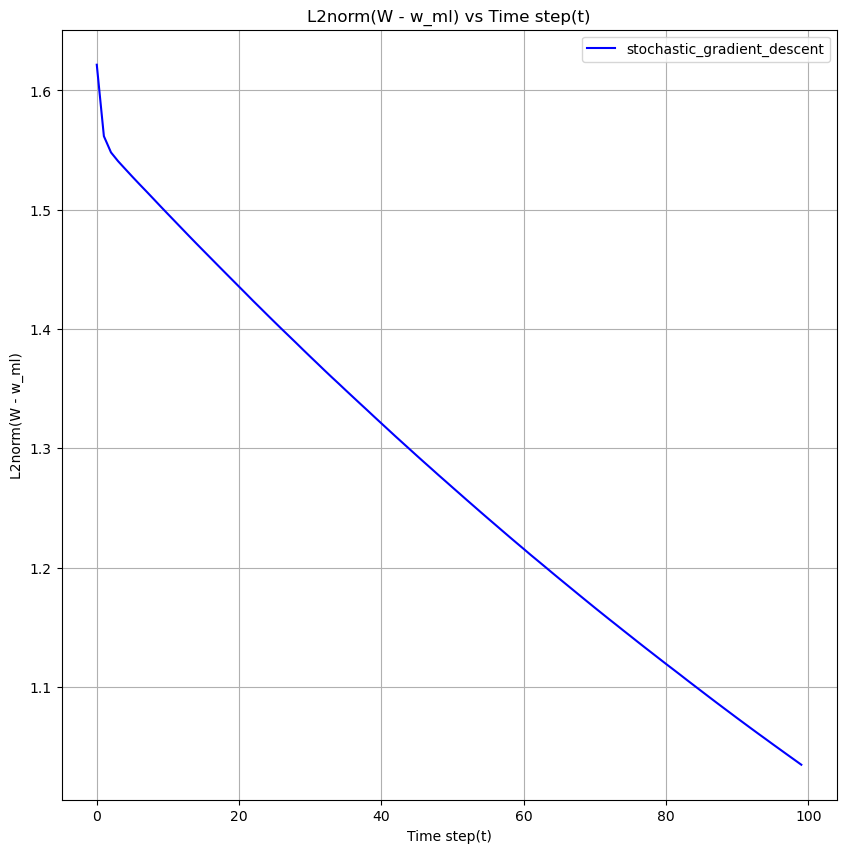

In [29]:
plt.figure(figsize=(10,10))
plt.plot(Epoch2,Grads2,c='b')
plt.title("L2norm(W - w_ml) vs Time step(t)")
plt.xlabel("Time step(t)")
plt.ylabel("L2norm(W - w_ml)")
plt.legend(["stochastic_gradient_descent"], loc ="upper right")
plt.grid(True)
plt.savefig('plots/stoachastic_gradient_descent.jpg')
plt.show()

In [30]:
data = np.hstack((X, Y))
np.random.shuffle(data)
split_ratio = 0.9
split = int(0.9 * data.shape[0])
X_train = data[:split,:-1]
Y_train = data[:split,-1].reshape((-1,1))
X_val = data[split:,:-1]
Y_val = data[split:,-1].reshape((-1,1))

In [31]:
Lambdas = [1e-1,1e-2,1e-3,2e-1,2e-2,2e-3,2e-4,1e-4,3e-1,3e-2,3e-3,3e-4,5e-1,5e-2,5e-3,5e-4,6e-1,6e-2,6e-3,6e-4,1]
WR = []
loss = []
for lambd in Lambdas:
    _loss,wr = gradient_descent_ridged(X_train,Y_train,X_val,Y_val,learning_rate=1e-3,max_epochs=100,lambd=lambd)
    loss.append(_loss)
    WR.append(wr)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 201.84it/s]


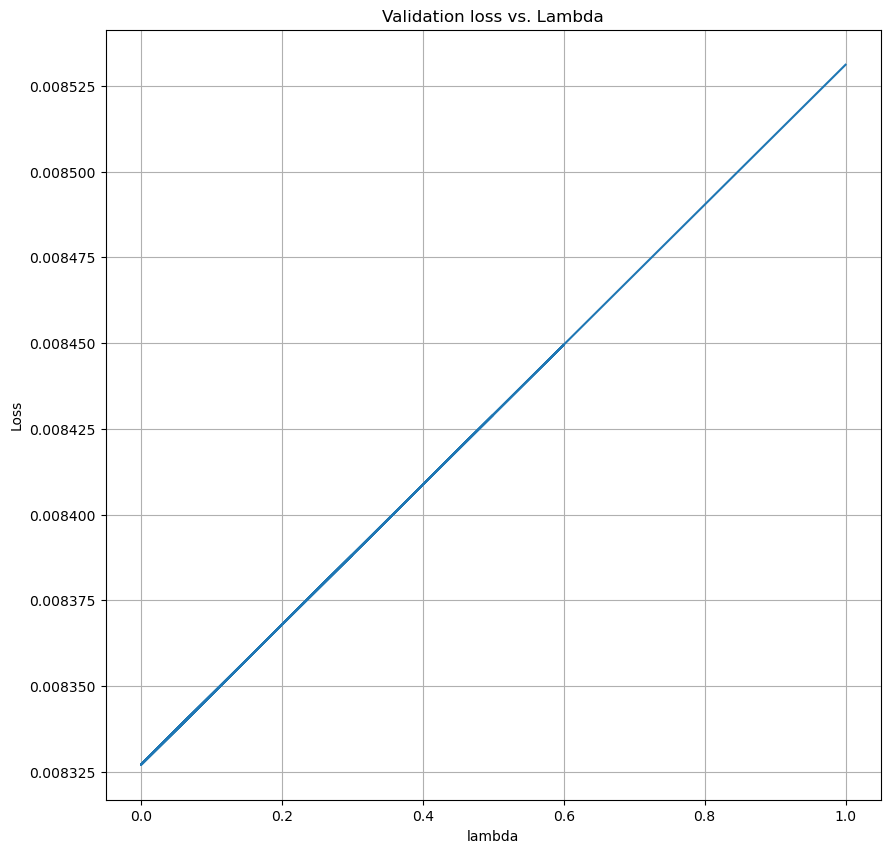

In [32]:
plt.figure(figsize=(10,10))
plt.plot(Lambdas,loss)
plt.title("Validation loss vs. Lambda")
plt.xlabel("lambda")
plt.ylabel("Loss")
plt.grid(True)
plt.savefig('plots/val_loss_vs_lambda2.jpg')
plt.show()

# Test

In [33]:
idx = np.argmin(loss)

In [16]:
test = np.genfromtxt("A2Q2Data_test.csv", delimiter=',')

In [17]:
X_test = test[:,:-1]
Y_test = test[:,-1].reshape((-1,1))

In [18]:
squared_loss_test_w_ml =  (1/(2*Y_test.shape[0]))*np.linalg.norm(X_test @ w_ml  - Y_test)**2
squared_loss_test_Wr = (1/(2*Y_test.shape[0]))*(np.linalg.norm(X_test @ WR[idx]  - Y_test)**2 + Lambdas[idx]*np.linalg.norm(WR[idx])**2) 

In [19]:
print(f"Test Loss with w_ml : {squared_loss_test_w_ml} , Test Loss with Wr : {squared_loss_test_Wr}")

Test Loss with w_ml : 0.1853636555848934 , Test Loss with Wr : 0.12131328145868576


In [22]:
squared_loss_test_w_ml =  (1/(2*Y_test.shape[0]))*np.linalg.norm(X_test @ w_ml  - Y_test)
squared_loss_test_Wr = (1/(2*Y_test.shape[0]))*(np.linalg.norm(X_test @ WR[idx]  - Y_test) + Lambdas[idx]*np.linalg.norm(WR[idx])) 

In [23]:
print(f"Test Loss with w_ml : {squared_loss_test_w_ml} , Test Loss with Wr : {squared_loss_test_Wr}")

Test Loss with w_ml : 0.013614832190845886 , Test Loss with Wr : 0.011014270908904607


In [24]:
squared_loss_test_w_ml = np.linalg.norm(X_test @ w_ml  - Y_test)
squared_loss_test_Wr = np.linalg.norm(X_test @ WR[idx]  - Y_test) + Lambdas[idx]*np.linalg.norm(WR[idx])

In [25]:
print(f"Test Loss with w_ml : {squared_loss_test_w_ml} , Test Loss with Wr : {squared_loss_test_Wr}")

Test Loss with w_ml : 13.614832190845886 , Test Loss with Wr : 11.014270908904606
